In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [46]:
import seaborn as sns
sns.set_style("whitegrid")

In [47]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min.fea')

In [48]:
noun_sentence_df_final_joined_df_selected_columns_use_min = noun_sentence_df_final_joined_df_selected_columns_use_min.dropna()

In [49]:
noun_sentence_df_final_joined_df_selected_columns_use_min.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_List_count', 'Transdate', 'Transprice', 'total_value',
       'cj_living_area', 'effective_year_built', 'story', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale', 'transaction_year'],
      dtype='object')

In [50]:
predictor_columns = [ 'cj_living_area',
       'avmValue']

In [51]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use_min.loc[:,predictor_columns].to_numpy()

In [52]:
Predictors.shape

(626428, 2)

In [53]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror.values

In [54]:
predictand.shape

(626428,)

In [55]:
train_samples = 200000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [56]:
np.max(X_train)

5233111.71

In [57]:
model = RandomForestRegressor(n_estimators = 50,  min_samples_leaf=50)

In [58]:
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=50, n_estimators=50)

In [59]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [60]:
y_train.min()

-1.4926238888888888

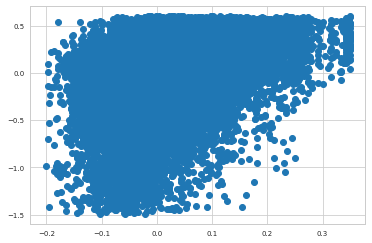

In [61]:
plt.plot(predictions_train,y_train,'o')

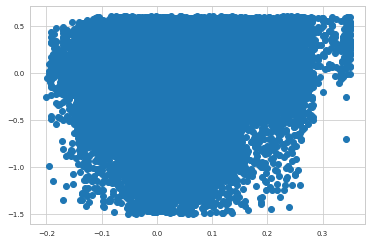

In [62]:
plt.plot(predictions_test,y_test,'o')

In [63]:
df = noun_sentence_df_final_joined_df_selected_columns_use_min.copy()


In [64]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [65]:
print(df.head(1)['avmValue'])
print(df.head(1)['Transprice'])
print(df.head(1)['avmerror'])
print(df.head(1)['avmValue']+df.head(1)['avmerror']*df.head(1)['avmValue'])
print((df.head(1)['Transprice']-df.head(1)['avmValue'])/df.head(1)['Transprice'])

0    135660.77
Name: avmValue, dtype: float64
0    150000.0
Name: Transprice, dtype: float64
0    0.095595
Name: avmerror, dtype: float64
0    148629.24322
dtype: float64
0    0.095595
dtype: float64


In [66]:
df.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_List_count', 'Transdate', 'Transprice', 'total_value',
       'cj_living_area', 'effective_year_built', 'story', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale', 'transaction_year'],
      dtype='object')

In [67]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.1175160037738531
0.12362300668830177


In [68]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.1283189239465213
0.12655919563081403


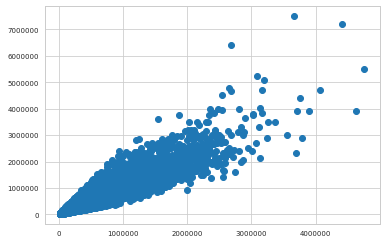

In [69]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [70]:
df.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_List_count', 'Transdate', 'Transprice', 'total_value',
       'cj_living_area', 'effective_year_built', 'story', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale', 'transaction_year'],
      dtype='object')

In [71]:
import joblib
filename = 'RF_newmodel_01_NoText.sav'
joblib.dump(model,filename)

['RF_newmodel_01_NoText.sav']